In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [15]:
# Load data
df = pd.read_csv(r'D:\ta_project\data\raw\data.csv')
df.head(10)

,No,Model Pakaian,Jenis Bahan,Waktu Pengerjaan,Pengalaman Penjahit,Detail Tambahan,Harga Jasa
0,1,Kebaya Tradisional,Katun,Reguler,Pemula,Tanpa ornamen,250000
1,2,Kebaya Tradisional,Katun,Ekspres,Menengah,Bordir,300000
2,3,Kebaya Tradisional,Sutra,Reguler,Mahir,Bordir,950000
3,4,Kebaya Tradisional,Lace,Ekspres,Pemula,Payet,350000
4,5,Kebaya Tradisional,Sifon,Reguler,Menengah,Payet,450000
5,6,Kebaya Modern,Katun,Ekspres,Mahir,Tanpa ornamen,350000
6,7,Kebaya Modern,Sutra,Reguler,Pemula,Bordir,320000
7,8,Kebaya Modern,Lace,Ekspres,Menengah,Payet,380000
8,9,Kebaya Modern,Sifon,Reguler,Mahir,Payet,400000
9,10,Kebaya Modern,Satin,Ekspres,Pemula,Renda,370000


In [16]:
df.drop(labels=['No'], axis=1, inplace=True)

Exploratory Data Analysis

In [17]:
# Data info
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Model Pakaian        150 non-null    object
 1   Jenis Bahan          150 non-null    object
 2   Waktu Pengerjaan     150 non-null    object
 3   Pengalaman Penjahit  150 non-null    object
 4   Detail Tambahan      150 non-null    object
 5   Harga Jasa           150 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 7.2+ KB


In [18]:
# Check missing values
print("Missing Values:")
df.isna().sum()

Missing Values:


Model Pakaian          0
Jenis Bahan            0
Waktu Pengerjaan       0
Pengalaman Penjahit    0
Detail Tambahan        0
Harga Jasa             0
dtype: int64

In [19]:
# Check duplicates
print("Duplicate Data:", df.duplicated().sum(), "data")

Duplicate Data: 52 data


In [20]:
# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicate data has been removed")

Duplicate data has been removed


Encoding

In [21]:
# Ordinal encoding
ordinal_cols = {
    'Waktu Pengerjaan': ['Reguler', 'Ekspres'],
    'Pengalaman Penjahit': ['Pemula', 'Menengah', 'Mahir']
}
    
for col, categories in ordinal_cols.items():
    if df[col].dtype == 'object':  
        encoder = OrdinalEncoder(categories=[categories])
        df[[col]] = encoder.fit_transform(df[[col]])

In [22]:
# One hot encoding
cat_cols = ['Model Pakaian', 'Jenis Bahan', 'Detail Tambahan']

if any(df[col].dtype == 'object' for col in cat_cols):
    cat_encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_array = cat_encoder.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded_array, columns=cat_encoder.get_feature_names_out(cat_cols), index=df.index)

    df = df.drop(columns=cat_cols)
    df = pd.concat([df, encoded_df], axis=1)

In [23]:
# Construct feature matrix X and target variable y
X = df.drop(columns=['Harga Jasa'])
y = df['Harga Jasa']

final_df = pd.concat([X, y], axis=1)
final_df.head()

,Waktu Pengerjaan,Pengalaman Penjahit,Model Pakaian_Kebaya Modern,Model Pakaian_Kebaya Tradisional,Model Pakaian_Maxi Dress,Model Pakaian_Midi Dress,Jenis Bahan_Lace,Jenis Bahan_Satin,Jenis Bahan_Sifon,Jenis Bahan_Sutra,Detail Tambahan_Opnaisel,Detail Tambahan_Payet,Detail Tambahan_Renda,Detail Tambahan_Tanpa ornamen,Harga Jasa
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,250000
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000
2,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,950000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,350000
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,450000


Statistic Analysis & Visualisasion

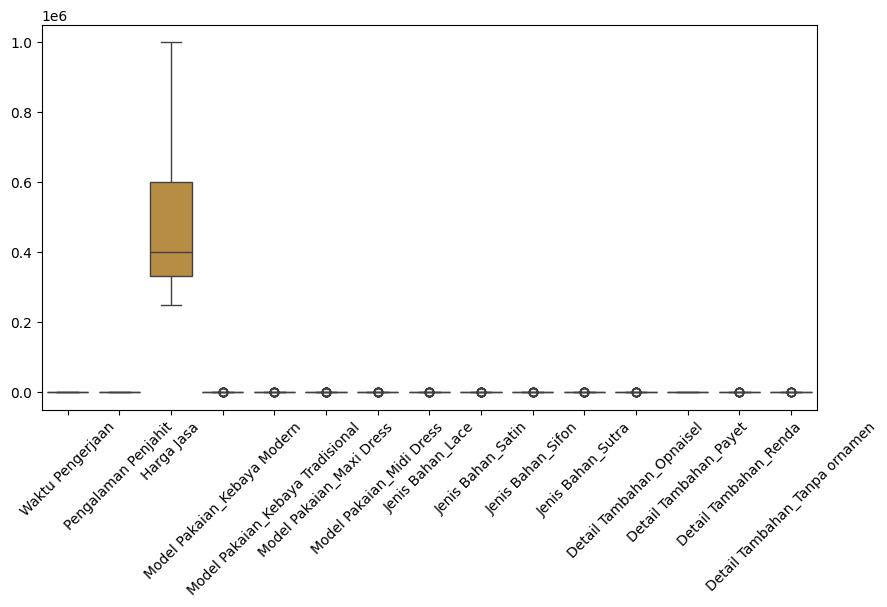

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

<Axes: >

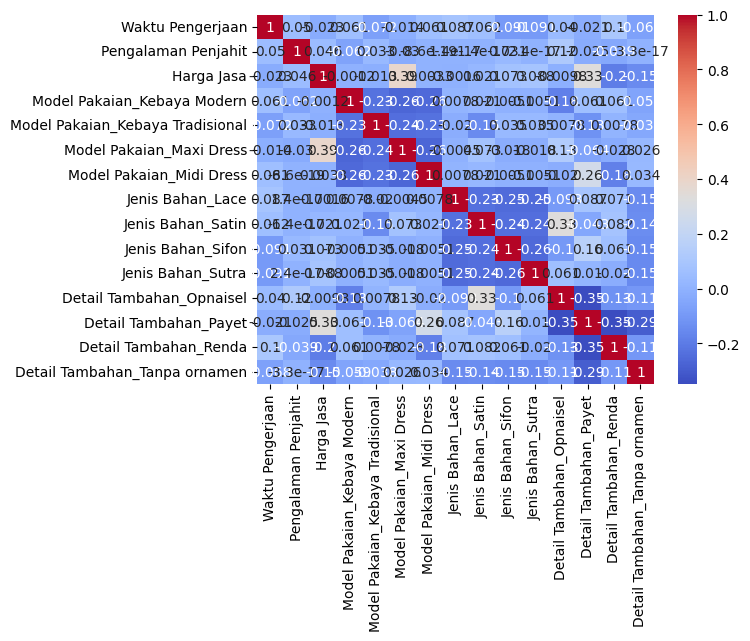

In [25]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")